In [1]:
import NNMFit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from scipy.interpolate import interp1d
from scipy.optimize import root_scalar


In [3]:
import matplotlib.font_manager as font_manager
font_axis_label = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 22,
        }
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
font_legend = font_manager.FontProperties(family='serif',
                                   weight='normal',
                                   style='normal', size=13)

plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.family':'serif'})

In [4]:
plotting_path = "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/plots/output/extraSPL_diffuse_12dec"
data_path = "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/extraSPL"
data_benchmark_path = "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override"

In [29]:
scan_dir_dict = {
                ## reco 10-100 PeV
                 "BPL_3_30PeV" : f"{data_path}/reco_10_100PeV/track_cscd_he_nominal_emptyICC_BPL_extraSPL_3_30PeV", 
                 "BPL_10_100PeV" : f"{data_path}/reco_10_100PeV/track_cscd_he_nominal_emptyICC_BPL_extraSPL_10_100PeV", 
                #  "BPL_30_300PeV" : f"{data_path}/reco_10_100PeV/track_cscd_he_nominal_emptyICC_BPL_extraSPL_30_300PeV", 
                #  "BPL_100_1000PeV" : f"{data_path}/reco_10_100PeV/track_cscd_he_nominal_emptyICC_BPL_extraSPL_100_1000PeV", 

                 "BPL_10_100PeV_bench" : f"{data_path}/track_cscd_he_nominal_emptyICC_BPL_10_100PeV", # with he event


                ## astro_he_scan
                #  "BPL_3_30PeV_scan" : f"{data_path}/reco_10_100PeV/scan_astro_he_norm/track_cscd_he_nominal_emptyICC_BPL_extraSPL_3_30PeV",
                 "BPL_10_100PeV_scan" : f"{data_path}/reco_10_100PeV/scan_astro_he_norm/track_cscd_he_nominal_emptyICC_BPL_extraSPL_10_100PeV",


                ## reco 30-300 PeV
                #  "BPL_3_30PeV" : f"{data_path}/reco_30_300PeV/track_cscd_he_nominal_emptyICC_BPL_extraSPL_3_30PeV", 
                #  "BPL_10_100PeV" : f"{data_path}/reco_30_300PeV/track_cscd_he_nominal_emptyICC_BPL_extraSPL_10_100PeV", 


                #  # 2D scans SPL
                #  "SPL_10_100PeV_2D" : f"{data_path}/2D_scan/track_cscd_emptyICC_SPL_10_100PeV", # 
                #  "he_SPL_10_100PeV_2D" : f"{data_path}/2D_scan/track_cscd_he_nominal_emptyICC_SPL_10_100PeV", # 



                 }

In [30]:
drop_unsuccessful = True

scan_dict = {}

bestfits = {}

x = {}
y = {}
dllh = {}

for name, scan_dir in scan_dir_dict.items():
    print(name)
    # use force_read if new scan points are produced
    scan_dict[name] = NNMFit.utilities.ScanHandler(scan_dir,dump=False,drop_unsuccessful=drop_unsuccessful)

    if "scan" in name: continue
    bestfits[name] = scan_dict[name].get_freefit(drop_unsuccessful="True")

    if "2D" in name:
        x[name], y[name], dllh[name] = scan_dict[name].get_scan_xydllh(x="astro_norm",y="gamma_astro",interpolate=True, drop_unsuccessful=drop_unsuccessful)
    



BPL_3_30PeV
BPL_10_100PeV
BPL_10_100PeV_bench
BPL_10_100PeV_scan


In [9]:
print(bestfits["BPL_3_30PeV"]["astro_he_norm_3_30PeV"])
print(bestfits["BPL_10_100PeV"]["astro_he_norm_10_100PeV"])
# print(bestfits["BPL_30_300PeV"]["astro_he_norm_30_300PeV"])
# print(bestfits["BPL_100_1000PeV"]["astro_he_norm_100_1000PeV"])

0.0012884707169402944
0.0010438973109042687


In [19]:
def plot_dllh( name, bestfitname, parameter ):

    bestfit = bestfits[bestfitname][parameter]

    scan = scan_dict[name].get_scan_df( param_name = parameter, dllh_ref=bestfits[bestfitname]["llh"],  drop_unsuccessful = drop_unsuccessful)


    fig, (ax) = plt.subplots(1, 1)

    ax.plot( scan[parameter], scan["dllh"] )
    ax.axhline(1.0, color="red", linestyle="--", label="dllh = 1.0")
    ax.axvline(bestfit, color="green", linestyle="--", label=f"Bestfit {bestfit:.3f}")

    ax.set_xlabel(parameter)
    ax.set_ylabel("dllh")

    ax.set_title(name)

    # ax.set_ylim( [ min(scan["dllh"]) - 1, min(scan["dllh"]) +5])
    ax.set_ylim( [ -1,5 ])

    ax.legend()

    # plt.savefig(f"{plotting_path}/dllh_name-{name}_parameter-{parameter}.pdf")



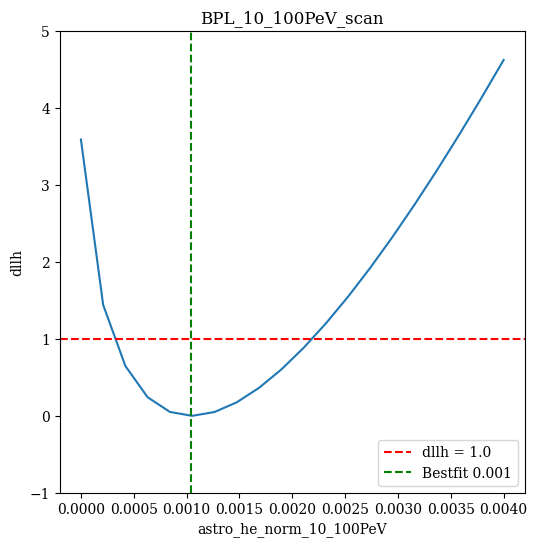

In [21]:
# for name in scan_dir_dict:
#     if "2D" in name: continue
#     parameters = scan_dict[name].get_scan_list()
#     for parameter in parameters:
#         if parameter == "freefit": continue
#         plot_dllh( name, parameter )

plot_dllh( "BPL_10_100PeV_scan",  "BPL_10_100PeV", "astro_he_norm_10_100PeV" )




In [9]:
def obtain_fitlist( name, parameters ):

    result =  f'{scan_dict[name].get_raw_df().loc["freefit"][parameters]}\n'

    result+=20*"-" + "\n"

    result+= f"{bestfits[name][parameters]}"
    return result




In [22]:

root_1_sigma = 1.0

def find_errors( name, bestfitname ):

    print(5*"-", name)

    parameters = scan_dict[name].get_scan_list()

    for parameter in parameters:

        if parameter == "freefit": continue

        print(parameter)

        # best fit
        print("bestfit", bestfits[bestfitname][parameter])

        scan = scan_dict[name].get_scan_df( param_name = parameter, dllh_ref = bestfits[bestfitname]["llh"] ,drop_unsuccessful = drop_unsuccessful)

        interpolator_dllh = interp1d(scan[parameter], scan["dllh"], kind='linear', fill_value="extrapolate")

        # Define a function to find the points where dllh = 1.0
        def find_root(value):
            return lambda x: interpolator_dllh(x) - value

        # Solve for points where dllh = 1.0
        roots = []
        for initial_guess in np.linspace(scan[parameter].min(), scan[parameter].max(), 100):
            # print(initial_guess, interpolator_dllh(initial_guess))
            try:
                sol = root_scalar(find_root(root_1_sigma), bracket=[initial_guess, initial_guess + (scan[parameter].max() - scan[parameter].min() )/50], method='bisect')
                if sol.converged:
                    roots.append(sol.root)
            except ValueError:
                continue  # Skip intervals where there are no solutions

        # print(roots)

        # Remove duplicate roots that are very close to each other
        threshold = 1e-2*( scan[parameter].max() - scan[parameter].min()  )  # Define a distance threshold
        unique_roots = []
        for root in roots:
            if not unique_roots or all(abs(root - ur) > threshold for ur in unique_roots):
                unique_roots.append(root)
            
        print(unique_roots)

        print(f"abs diff {abs(unique_roots-bestfits[bestfitname][parameter])}")

        return unique_roots



In [23]:
errors = {}

# keys = ["BPL_3_30PeV","BPL_10_100PeV"]
keys = ["BPL_10_100PeV"]

for key in keys:

    error = find_errors( f"{key}_scan", key )

    if len(error) != 2: 
        print("error", error)
        break

    errors[key] = { "low" : min(error), "high" : max(error) }

# for name in scan_dir_dict:
#     if "2D" in name or "scan" in name: continue
#     find_errors(name, name)

----- BPL_10_100PeV_scan
astro_he_norm_10_100PeV
bestfit 0.0010438973109042687
[0.0003274629003953452, 0.002184818404672122]
abs diff [0.00071643 0.00114092]


In [32]:
import scipy.stats as stats


def calculate_sigma(chi2_value, degrees_of_freedom = 3):

    # Calculate the p-value from the chi-squared survival function
    p_value = stats.chi2.sf(chi2_value, degrees_of_freedom)

    # Convert p-value to sigma (number of standard deviations)
    sigma_significance = stats.norm.isf(p_value)

    return sigma_significance

In [34]:
# # compare chi2
# print("BPL over SPL")
# degrees_of_freedom = 2
# print("10_100PeV",-2*(bestfits["BPL_10_100PeV_bench"].llh-bestfits["SPL_10_100PeV_bench"].llh), calculate_sigma( -2*(bestfits["BPL_10_100PeV_bench"].llh-bestfits["SPL_10_100PeV_bench"].llh), degrees_of_freedom=degrees_of_freedom ) )
# print("30_300PeV",-2*(bestfits["BPL_30_300PeV_bench"].llh-bestfits["SPL_30_300PeV_bench"].llh), calculate_sigma( -2*(bestfits["BPL_30_300PeV_bench"].llh-bestfits["SPL_30_300PeV_bench"].llh), degrees_of_freedom=degrees_of_freedom ) )
# print("100_1000PeV",-2*(bestfits["BPL_100_1000PeV_bench"].llh-bestfits["SPL_100_1000PeV_bench"].llh), calculate_sigma( -2*(bestfits["BPL_100_1000PeV_bench"].llh-bestfits["SPL_100_1000PeV_bench"].llh), degrees_of_freedom=degrees_of_freedom ) )


degrees_of_freedom = 1
print(10*"-", "reco 10-100PeV")
print("BPL with SPL 10-100PeV",-2*(bestfits["BPL_10_100PeV"].llh-bestfits["BPL_10_100PeV_bench"].llh), calculate_sigma( -2*(bestfits["BPL_10_100PeV"].llh-bestfits["BPL_10_100PeV_bench"].llh), degrees_of_freedom=degrees_of_freedom ) )
print("BPL with SPL 3-30PeV",-2*(bestfits["BPL_3_30PeV"].llh-bestfits["BPL_10_100PeV_bench"].llh), calculate_sigma( -2*(bestfits["BPL_3_30PeV"].llh-bestfits["BPL_10_100PeV_bench"].llh), degrees_of_freedom=degrees_of_freedom ) )



---------- reco 10-100PeV
BPL with SPL 10-100PeV 3.5889235864033253 1.5703581391436405
BPL with SPL 3-30PeV 1.703387257887698 0.8711153281040868


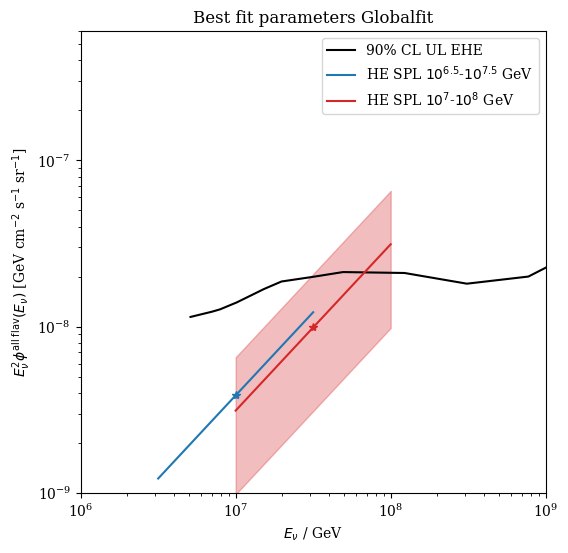

In [73]:
# import EHE differential limits
ehe_csv = pd.read_csv("/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/plots/quasi_diff_ehe_ul.csv")

def powerlaw( energy, norm, gamma ):
    return 3*norm*(energy/1e5)**(2-gamma) # 3 for all neutrino flavour flux

norm_factor = 1e-8

bestfit_astro_he_norm = {}
bestfit_astro_he_norm_low = {}
bestfit_astro_he_norm_high = {}
log_energies = {}
energies = {}
flux_powerlaw = {}
flux_powerlaw_low = {}
flux_powerlaw_high = {}

# keys = ["BPL_3_30PeV","BPL_10_100PeV","BPL_30_300PeV", "BPL_100_1000PeV"]
keys = ["BPL_3_30PeV","BPL_10_100PeV"]
labels = [r"HE SPL $10^{6.5}$-$10^{7.5}$ GeV",r"HE SPL $10^7$-$10^8$ GeV",r"HE $10^{7.5}$-$10^{8.5}$ GeV",r"HE $10^8$-$10^9$ GeV"]
astro_he_norm_keys = ["astro_he_norm_3_30PeV","astro_he_norm_10_100PeV","astro_he_norm_30_300PeV","astro_he_norm_100_1000PeV"]
bounds = [(6.5,7.5),(7,8),(7.5,8.5),(8,9)]
centers = [7.5,8.,8.5]
centers = [7.,7.5,8.,8.5]
colors = ["C0", "C3", "C2", "C4"]

# plotting
fig, (ax) = plt.subplots(1, 1)

ax.plot( ehe_csv["energy"],  ehe_csv["ul"], label = "90% CL UL EHE", color = "black" )

for i,key in enumerate(keys):
    bestfit_astro_he_norm[key] = bestfits[key][astro_he_norm_keys[i]]
    log_energies[key] = np.linspace(bounds[i][0],bounds[i][1],1001)
    energies[key] = 10**log_energies[key]
    flux_powerlaw[key] = powerlaw( energies[key], norm = bestfit_astro_he_norm[key]*norm_factor, gamma = 1)
    ax.plot( energies[key], flux_powerlaw[key], label = labels[i], color = colors[i] )
    ax.plot( [10**centers[i]], [3*bestfit_astro_he_norm[key]*norm_factor*(10**centers[i]/1e5)**(2-1.0)], "*", color = colors[i] )

key = "BPL_10_100PeV"
i = 1

bestfit_astro_he_norm_low[key] = errors[key]["low"]
bestfit_astro_he_norm_high[key] = errors[key]["high"]

flux_powerlaw_low[key] = powerlaw( energies[key], norm = bestfit_astro_he_norm_low[key]*norm_factor, gamma = 1)
flux_powerlaw_high[key] = powerlaw( energies[key], norm = bestfit_astro_he_norm_high[key]*norm_factor, gamma = 1)

plt.fill_between( energies[key], flux_powerlaw_low[key], flux_powerlaw_high[key], color=colors[i], alpha=0.3)

ax.set_xlabel(r"$E_{\nu}$ / GeV")
ax.set_ylabel(r"$E_{\nu}^2 \phi^{\text{all flav}}(E_\nu)$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]")

ax.set_title("Best fit parameters Globalfit")

ax.set_yscale("log")
ax.set_xscale("log")

ax.set_xlim( [ 1e6,1e9 ])
ax.set_ylim( [ 1e-9,6e-7 ])

ax.legend(ncol = 1)

plt.savefig(f"{plotting_path}/diff_limit_ehe_reco_10_100PeV.pdf")


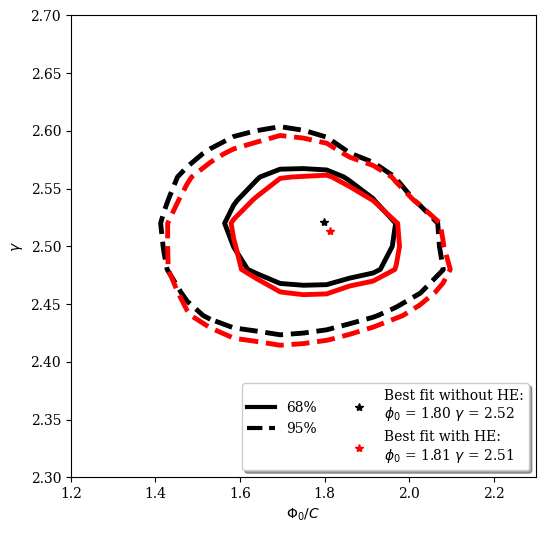

In [99]:
name1 = "SPL_10_100PeV_2D"
name2 = "he_SPL_10_100PeV_2D"

best_fit1 = scan_dict[name1].get_freefit(drop_unsuccessful="True")
norm1 = best_fit1['astro_norm']
gamma1 = best_fit1['gamma_astro']

best_fit2 = scan_dict[name2].get_freefit(drop_unsuccessful="True")
norm2 = best_fit2['astro_norm']
gamma2 = best_fit2['gamma_astro']

levels = [2.3,5.99]  # 50% 2.3 1sigma (68%), 5.99 2sigma (95%)
levlabels = ["68%", "95%"]

colors = ["black", "red", "black", "red"]
labels = ["Without HE", "With HE"]
linestyles = ["-","--"]

fig, (ax) = plt.subplots(1, 1)

ll, lh = [], []

cntr1 = ax.contour( x[name1], y[name1], dllh[name1], 
                levels=levels, colors=colors[0], linewidths=3.5, linestyles = linestyles )

cntr2 = ax.contour( x[name2], y[name2], dllh[name2], 
                levels=levels, colors=colors[1], linewidths=3.5, linestyles = linestyles )

# best fit
dot1, = ax.plot([norm1], [gamma1], "*", color=colors[0])

# best fit
dot2, = ax.plot([norm2], [gamma2], "*", color=colors[1])


lh.append( Line2D([0], [0], linewidth=3.,color='black') ) # legend elements
ll.append( levlabels[0] ) # legend text

lh.append( Line2D([0], [0], linewidth=3.,linestyle = "--",color='black') ) # legend elements
ll.append( levlabels[1] ) # legend text

lh.append(dot1)
ll.append("Best fit without HE:\n" + r"$\phi_0$ = " + f"{norm1:.2f}" + r" $\gamma$ = " + f"{gamma1:.2f}")

lh.append(dot2)
ll.append("Best fit with HE:\n" + r"$\phi_0$ = " + f"{norm2:.2f}" + r" $\gamma$ = " + f"{gamma2:.2f}")

ax.set_xlabel(r"$\Phi_0/C$")
ax.set_ylabel(r"$\gamma$")

l3 = ax.legend(lh,ll,loc = "lower right",
                ncols=2,frameon=True,fancybox=True,shadow=True)

plt.savefig(f"{plotting_path}/compare_contour_bestfit_{name1}-{name2}.pdf")

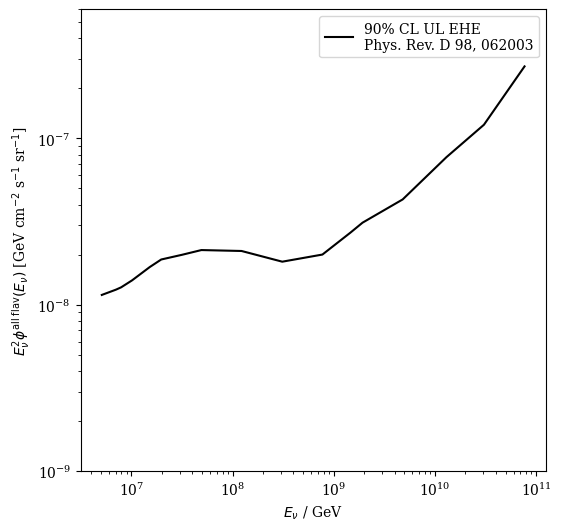

In [38]:
# plot ehe
fig, (ax) = plt.subplots(1, 1)

ax.plot( ehe_csv["energy"],  ehe_csv["ul"], label = "90% CL UL EHE\nPhys. Rev. D 98, 062003", color = "black" )

ax.set_xlabel(r"$E_{\nu}$ / GeV")
ax.set_ylabel(r"$E_{\nu}^2 \phi^{\text{all flav}}(E_\nu)$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]")

ax.set_yscale("log")
ax.set_xscale("log")

ax.set_ylim( [ 1e-1,1e3 ])
ax.set_ylim( [ 1e-9,6e-7 ])

ax.legend(ncol = 1)

plt.savefig(f"{plotting_path}/diff_limit_ehe.pdf")

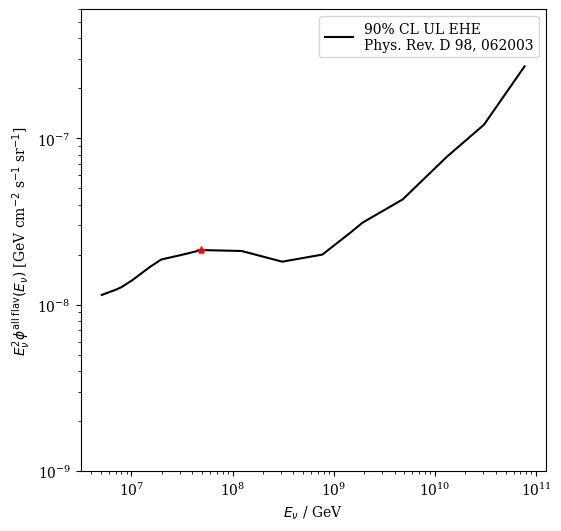

In [67]:
def powerlaw( energy, norm, gamma ):
    return 3*norm*(energy/1e5)**(2-gamma) # 3 for all neutrino flavour flux


# explanation
fig, (ax) = plt.subplots(1, 1)

example_point = 7

norm_ex = ehe_csv["ul"][example_point]
log_energies_ex = np.linspace( np.log10(ehe_csv["energy"][example_point]) -0.5, np.log10(ehe_csv["energy"][example_point]) + 0.5 ,10)
energies_ex = 10**log_energies_ex

    # ax.plot( [10**centers[i]], [3*bestfit_astro_he_norm[key]*norm_factor*(10**centers[i]/1e5)**(2-1.0)], "*", color = colors[i] )

bestfit_astro_he_norm_ex = norm_ex/(3*norm_factor*(ehe_csv["energy"][example_point]/1e5)**(2.0-1.0))

flux_powerlaw_ex = powerlaw( energies_ex, norm = bestfit_astro_he_norm_ex*norm_factor, gamma = 1)

ax.plot( ehe_csv["energy"],  ehe_csv["ul"], label = "90% CL UL EHE\nPhys. Rev. D 98, 062003", color = "black" )
ax.plot( ehe_csv["energy"][example_point],  ehe_csv["ul"][example_point], "*", color = "red" )
# ax.plot( energies_ex, flux_powerlaw_ex, color="red" )


ax.set_xlabel(r"$E_{\nu}$ / GeV")
ax.set_ylabel(r"$E_{\nu}^2 \phi^{\text{all flav}}(E_\nu)$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]")

ax.set_yscale("log")
ax.set_xscale("log")

ax.set_ylim( [ 1e-1,1e3 ])
ax.set_ylim( [ 1e-9,6e-7 ])


ax.legend(ncol = 1)

plt.savefig(f"{plotting_path}/diff_limit_ehe_explanation_1.pdf")

In [49]:
energies_ex
flux_powerlaw_ex

array([4.10549677e-21, 5.30245297e-21, 6.84838136e-21, 8.84502465e-21,
       1.14237886e-20, 1.47543904e-20, 1.90560279e-20, 2.46118065e-20,
       3.17873705e-20, 4.10549677e-20])